In [1]:
library(rmarkdown)
library(scholar)      # To request data from google scholar.
library(tidyverse)    # What do you do without?
library(hrbrthemes)
library(DT)

Warning message:
“package ‘scholar’ was built under R version 3.6.3”Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1     ✔ purrr   0.3.2
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘hrbrthemes’ was built under R version 3.6.2”NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.
      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and
      if Arial Narrow is not

ERROR: Error in library(DT): there is no package called ‘DT’


In [13]:
# Define the google scholar id
id <- '3kDP4-AAAAAJ&hl'       # Benjamin Mary
get_num_articles(id)
get_coauthors(id)


[1] 33

author,coauthors
Benjamin Mary,Giorgio Cassiani
Benjamin Mary,Yuxin Wu
Benjamin Mary,Jacopo Boaga
Benjamin Mary,Michel Vennetier
Benjamin Mary,Susan S. Hubbard


In [2]:
# Make an object called l with all the basic info of this id: name, affiliation, # of cites, H index, homepage ...
l <- get_profile(id)
name=l$name
tmp=strsplit(name, " ") %>% unlist()
last_name = tmp[length(tmp)]

# Show the last name
last_name

Warning message in is.na(id):
“is.na() applied to non-(list or vector) of type 'closure'”

ERROR: Error in as.character(function (.variables, drop = FALSE) : cannot coerce type 'closure' to vector of type 'character'


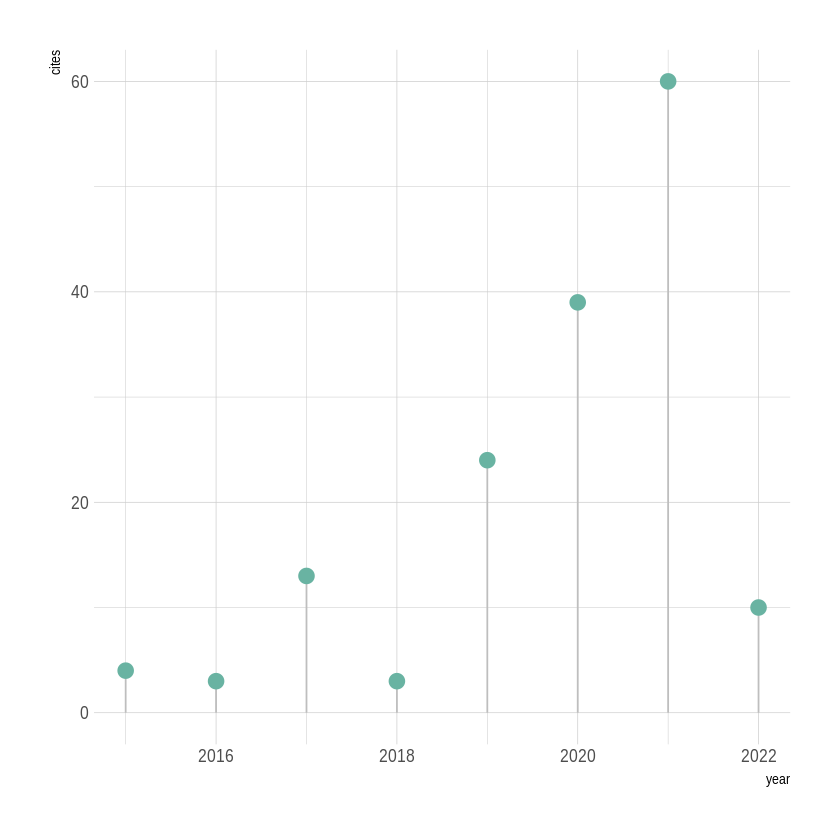

In [7]:
# get the info
citation = get_citation_history(id)

# plot it
citation %>% 
  ggplot( aes(x=year, y=cites)) + 
    geom_segment( aes(x=year, y=0, xend=year, yend=cites), color="grey") +
    geom_point( size=4, col="#69b3a2") + 
    theme_ipsum()

In [3]:
data=get_publications(id)
datatable(data, rownames = FALSE,  options = list(pageLength = 4))

ERROR: Error in as.character(function (.variables, drop = FALSE) : cannot coerce type 'closure' to vector of type 'character'


function (..., list = character(), package = NULL, lib.loc = NULL, 
    verbose = getOption("verbose"), envir = .GlobalEnv, overwrite = TRUE) 
{
    fileExt <- function(x) {
        db <- grepl("\\.[^.]+\\.(gz|bz2|xz)$", x)
        ans <- sub(".*\\.", "", x)
        ans[db] <- sub(".*\\.([^.]+\\.)(gz|bz2|xz)$", "\\1\\2", 
            x[db])
        ans
    }
    names <- c(as.character(substitute(list(...))[-1L]), list)
    if (!is.null(package)) {
        if (!is.character(package)) 
            stop("'package' must be a character string or NULL")
        if (any(package %in% "base")) 
            warning("datasets have been moved from package 'base' to package 'datasets'")
        if (any(package %in% "stats")) 
            warning("datasets have been moved from package 'stats' to package 'datasets'")
        package[package %in% c("base", "stats")] <- "datasets"
    }
    paths <- find.package(package, lib.loc, verbose = verbose)
    if (is.null(lib.loc)) 
        paths <- c(path.package(package, TRUE), if (!length(package)) getwd(), 
            paths)
    paths <- unique(normalizePath(paths[file.exists(paths)]))
    paths <- paths[dir.exists(file.path(paths, "data"))]
    dataExts <- tools:::.make_file_exts("data")
    if (length(names) == 0L) {
        db <- matrix(character(), nrow = 0L, ncol = 4L)
        for (path in paths) {
            entries <- NULL
            packageName <- if (file_test("-f", file.path(path, 
                "DESCRIPTION"))) 
                basename(path)
            else "."
            if (file_test("-f", INDEX <- file.path(path, "Meta", 
                "data.rds"))) {
                entries <- readRDS(INDEX)
            }
            else {
                dataDir <- file.path(path, "data")
                entries <- tools::list_files_with_type(dataDir, 
                  "data")
                if (length(entries)) {
                  entries <- unique(tools::file_path_sans_ext(basename(entries)))
                  entries <- cbind(entries, "")
                }
            }
            if (NROW(entries)) {
                if (is.matrix(entries) && ncol(entries) == 2L) 
                  db <- rbind(db, cbind(packageName, dirname(path), 
                    entries))
                else warning(gettextf("data index for package %s is invalid and will be ignored", 
                  sQuote(packageName)), domain = NA, call. = FALSE)
            }
        }
        colnames(db) <- c("Package", "LibPath", "Item", "Title")
        footer <- if (missing(package)) 
            paste0("Use ", sQuote(paste("data(package =", ".packages(all.available = TRUE))")), 
                "\n", "to list the data sets in all *available* packages.")
        else NULL
        y <- list(title = "Data sets", header = NULL, results = db, 
            footer = footer)
        class(y) <- "packageIQR"
        return(y)
    }
    paths <- file.path(paths, "data")
    for (name in names) {
        found <- FALSE
        for (p in paths) {
            tmp_env <- if (overwrite) 
                envir
            else new.env()
            if (file_test("-f", file.path(p, "Rdata.rds"))) {
                rds <- readRDS(file.path(p, "Rdata.rds"))
                if (name %in% names(rds)) {
                  found <- TRUE
                  if (verbose) 
                    message(sprintf("name=%s:\t found in Rdata.rds", 
                      name), domain = NA)
                  thispkg <- sub(".*/([^/]*)/data$", "\\1", p)
                  thispkg <- sub("_.*$", "", thispkg)
                  thispkg <- paste0("package:", thispkg)
                  objs <- rds[[name]]
                  lazyLoad(file.path(p, "Rdata"), envir = tmp_env, 
                    filter = function(x) x %in% objs)
                  break
                }
                else if (verbose) 
                  message(sprintf("name=%s:\t NOT found in names() of Rdata.rds, i.e.,\n\t%s\n", 
                    name, paste(names(rds), collapse = ",")

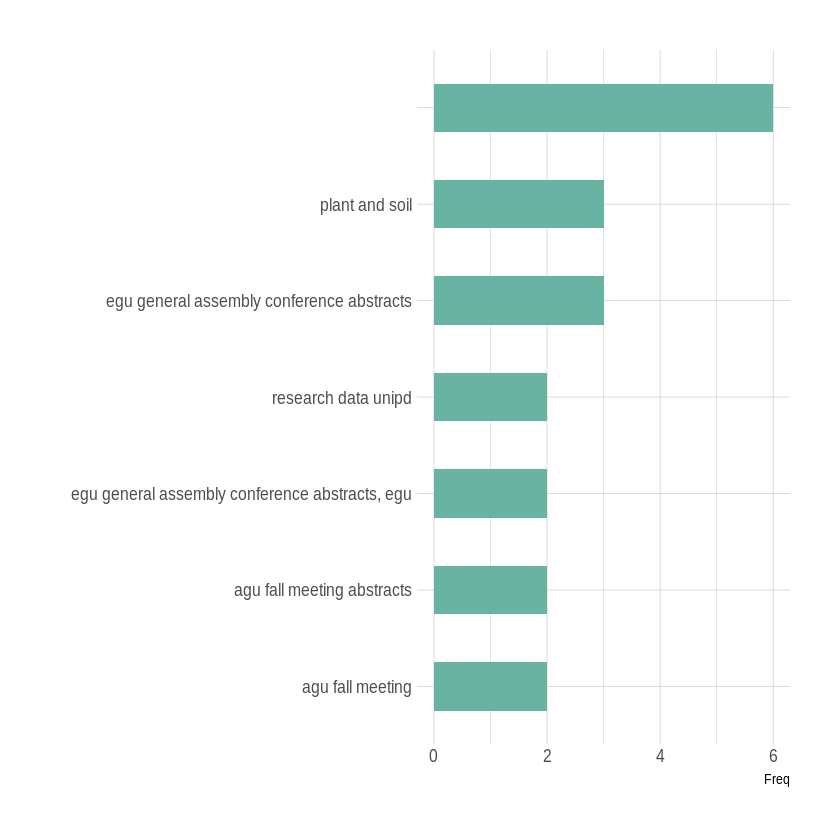

In [9]:
table(tolower(data$journal)) %>% as.data.frame() %>% filter(Freq>1) %>% arrange(Freq) %>% mutate(Var1=factor(Var1, Var1)) %>%
  ggplot(aes(x=Var1, y=Freq)) +
    geom_bar(stat="identity", width=0.5, fill="#69b3a2") +
    coord_flip() +
    xlab("") +
    theme_ipsum()

Warning message:
“Removed 4 rows containing non-finite values (stat_count).”

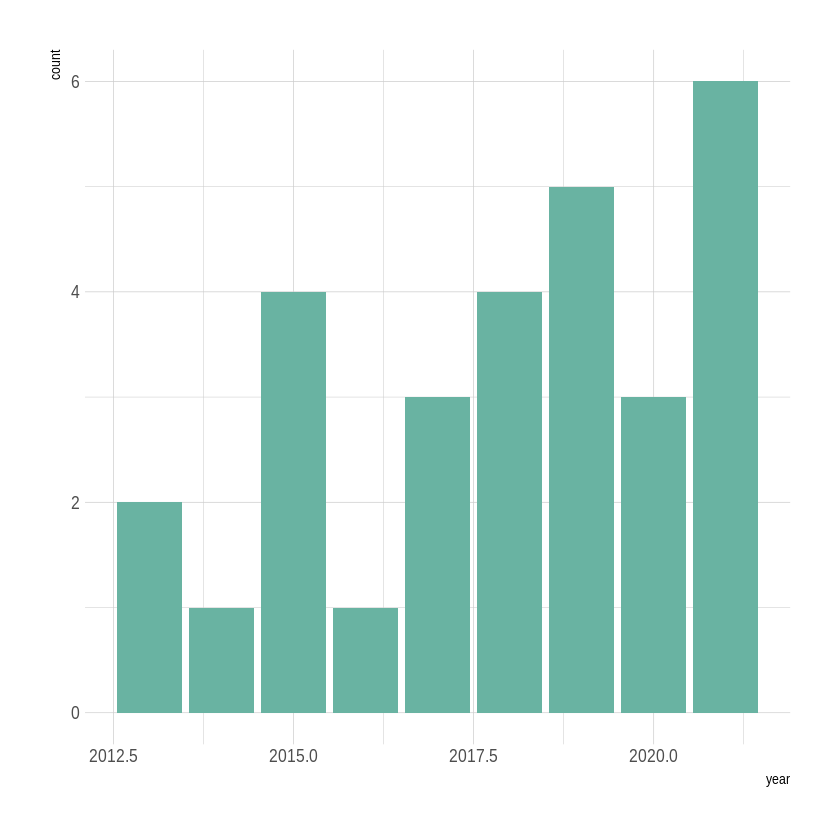

In [10]:
data %>% 
  ggplot(aes(x=year)) + 
    geom_bar( fill="#69b3a2") +
    theme_ipsum()

In [11]:
# Compute all the pairs observed in the dataset:
return_all_pair=function(x){
  tmp = x  %>% gsub(", \\.\\.\\.", "", .) %>% strsplit(", ")  %>% unlist()
  if(length(tmp)>1){
    tmp = t(combn(tmp, 2))
  }
  return(tmp)
}
list_of_pairs = lapply( data$author, return_all_pair ) 
connect = do.call(rbind, list_of_pairs) %>% unique()
colnames(connect)=c("from", "to")

# Delete the target author from this list
connect = connect %>% 
  as.data.frame() %>% 
  filter( !grepl(last_name, from, ignore.case = TRUE) ) %>% 
  filter( !grepl(last_name, to, ignore.case = TRUE) )

# Change format to adjacency matrix and save it
#connect %>% 
#  mutate(value=1) %>%
#  spread(from, to)

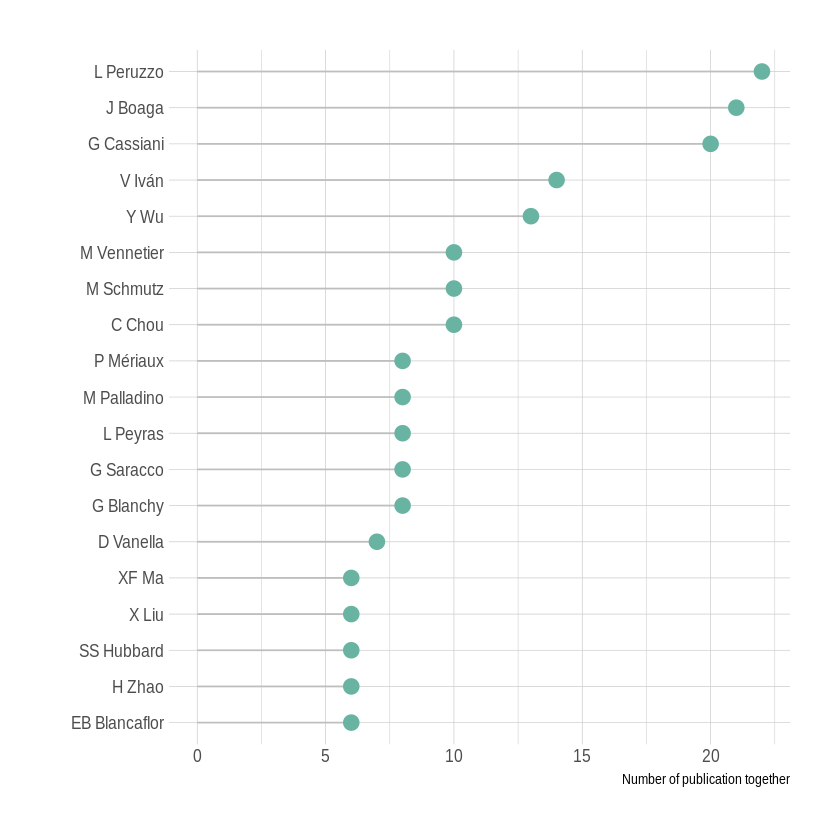

In [12]:
c( as.character(connect$from), as.character(connect$to)) %>% 
  table() %>% 
  as.data.frame() %>% 
  filter(Freq>5) %>% 
  arrange(Freq) %>% 
  mutate(Var1=factor(.,.)) %>%
    ggplot(aes(x=Var1, y=Freq)) +
      geom_segment( aes(x=Var1, y=0, xend=Var1, yend=Freq), color="grey") +
      geom_point( size=4, col="#69b3a2") + 
      coord_flip() +
      xlab("") +
      theme_ipsum() +
      ylab("Number of publication together")


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:tidyr’:

    crossing

The following object is masked from ‘package:tibble’:

    as_data_frame

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] "Mary"

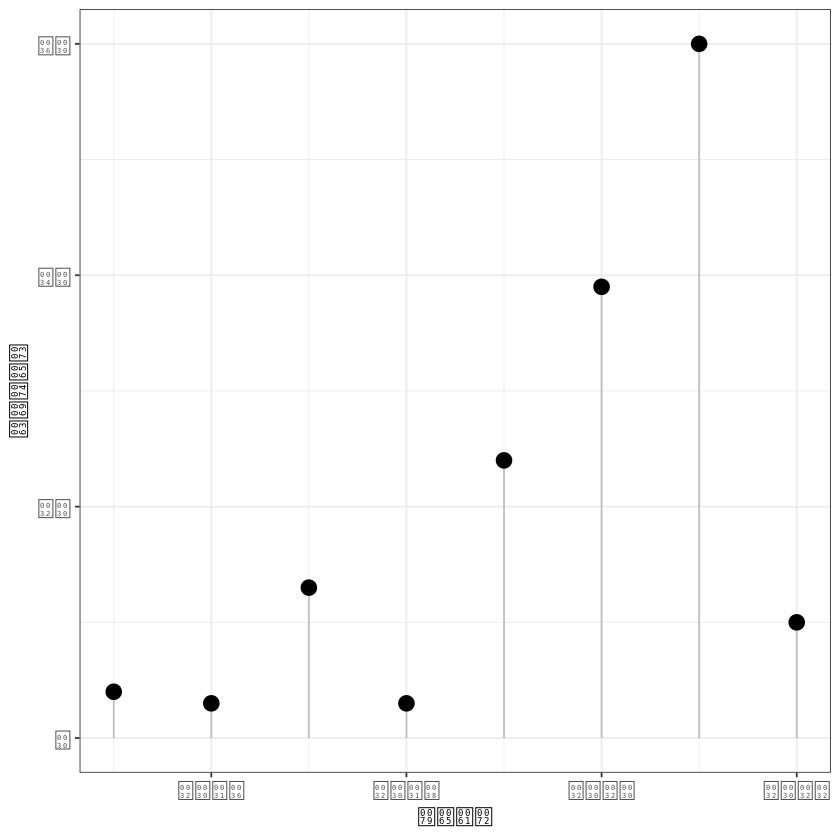

In [4]:


# Load libraries
library(scholar)      # To request data from google scholar.
library(tidyverse)    # What do you do without?
library(igraph)       # To create a Network Object.
library(ggraph)       # To create the network visualization.

# Define the google scholar ids for several researchers
id <- '3kDP4-AAAAAJ&hl'       # Benjamin Mary


# Get his profile and print his name
l <- get_profile(id)
name=l$name
tmp=strsplit(name, " ") %>% unlist()
last_name = tmp[length(tmp)]
last_name

# Get his citation history, i.e. citations to his work in a given year 
citation = get_citation_history(id)
citation %>% 
  ggplot( aes(x=year, y=cites)) + 
    geom_segment( aes(x=year, y=0, xend=year, yend=cites), color="grey") +
    geom_point( size=4) + 
    theme_bw()

[1] 242

[1] 177

[1] 56

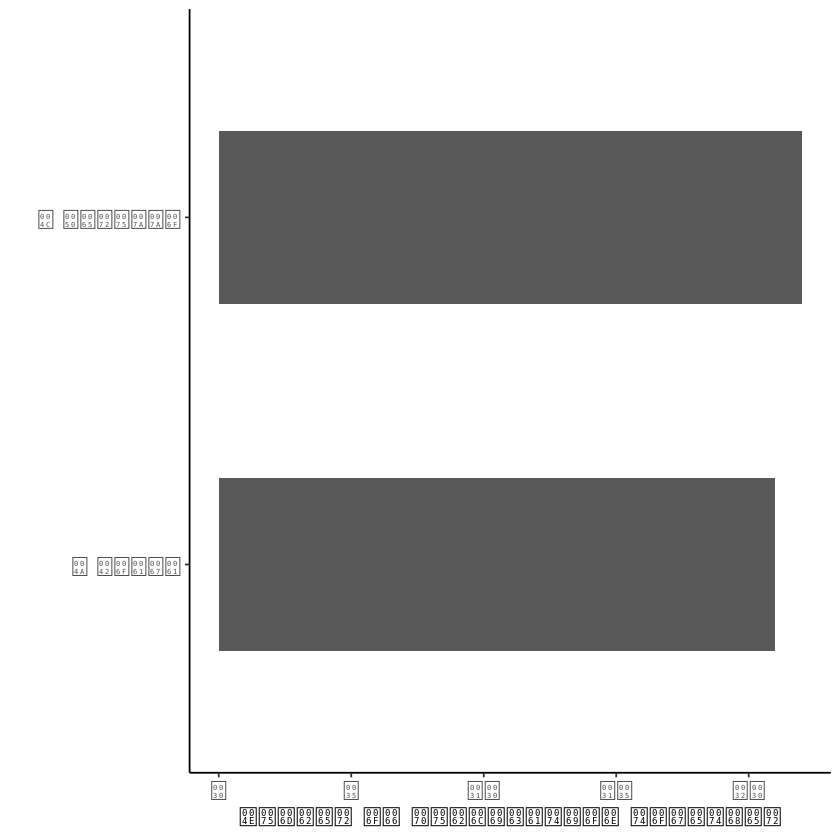

In [30]:
# Get his publications (a large data frame)
data=get_publications(id)


# Make a dataframe with all the connection between author?
list_of_pairs = lapply( data$author, return_all_pair ) 
# Concatenate all these list in a data frame
connect = do.call(rbind, list_of_pairs) %>% unique()
colnames(connect)=c("from", "to")
nrow(connect)

# Delete the target author
connect = connect %>% 
  as.data.frame() %>% 
  filter( !grepl(last_name, from, ignore.case = TRUE) ) %>% 
  filter( !grepl(last_name, to, ignore.case = TRUE) )
nrow(connect)

# Number of different coauthor?
N_coauthor = c( as.character(connect$from), as.character(connect$to)) %>% unique() %>% length()
N_coauthor

# Top - coauthor?
c( as.character(connect$from), as.character(connect$to)) %>% table() %>% as.data.frame() %>% filter(Freq>20) %>% arrange(Freq) %>% mutate(Var1=factor(.,.)) %>%
  ggplot(aes(x=Var1, y=Freq)) +
  geom_bar(stat="identity", width=0.5) +
  coord_flip() +
  xlab("") +
  theme_classic() +
  ylab("Number of publication together")

# Make a data frame with caracteristics concerning the co authors?
coauth=data.frame(name=unique(c( as.character(connect$from), as.character(connect$to)) ))
#Average year of copublication with our target?
return_year=function(i){
  name=gsub(" ", "", i)
  myrows=grep(name, gsub(" ", "", data$author))
  val=mean(data$year[ myrows ], na.rm=T)
  return(val)
}
coauth$year = sapply(coauth$name, return_year)


[1] 0.5087299

    L Peruzzo       J Boaga     M Schmutz          Y Wu    SS Hubbard 
            1             2             1             1             3 
    D Vanella     S Consoli   M Vennetier     C Zanetti     G Saracco 
            4             4             5             5             5 
     L Peyras     P Mériaux       N Cenni  F Abdulsamad        C Chou 
            5             5             3             6             1 
    FM Wagner       S Garré     D Hyndman   M Palladino        B Sica 
            1             7             7             2             2 
 S Chiavarini     J Rimauro    A Salluzzo         X Liu EB Blancaflor 
            2             2             2             1             1 
       H Zhao         XF Ma        V Iván       E Facca      G Manoli 
            1             1             1             1             1 
      M Putti    G Cassiani      I Barone     G Blanchy     M Weigand 
            1             2             8             2             9 
     F

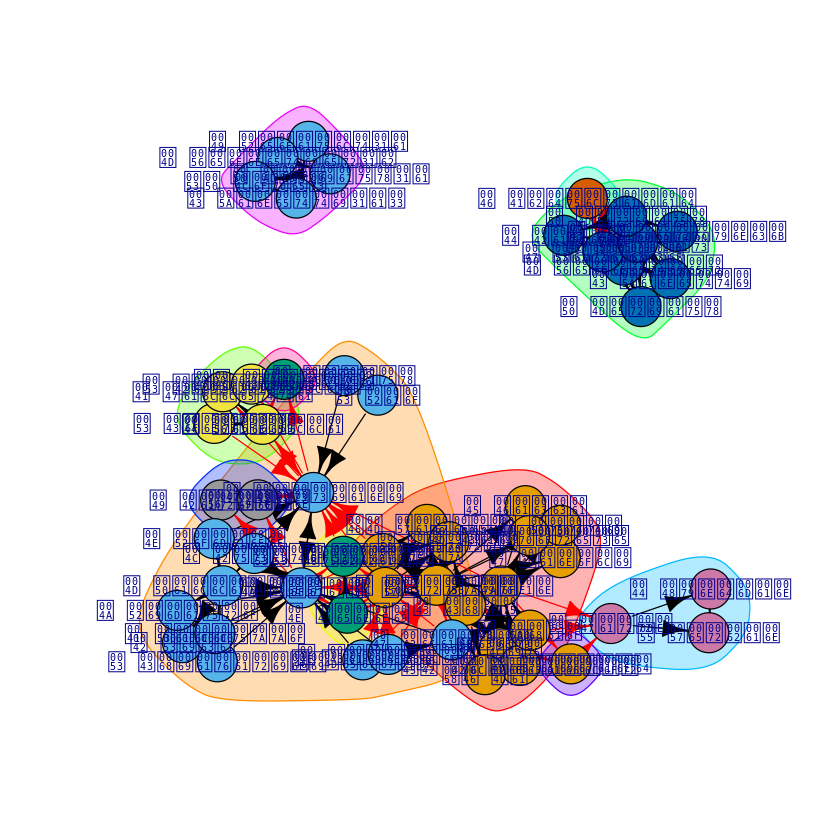

In [27]:
# Plot the network?
mygraph <- graph_from_data_frame( connect, vertices=coauth)

# Find the number of connection per people
V(mygraph)$vertex_degree <-  degree(mygraph)
V(mygraph)$vertex_degree[V(mygraph)$vertex_degree<10]=0

# Find the community?
wc <- cluster_edge_betweenness(mygraph)
modularity(wc)
membership(wc)
plot(wc, mygraph)

[1] 0.5087299

    L Peruzzo       J Boaga     M Schmutz          Y Wu    SS Hubbard 
            1             2             1             1             3 
    D Vanella     S Consoli   M Vennetier     C Zanetti     G Saracco 
            4             4             5             5             5 
     L Peyras     P Mériaux       N Cenni  F Abdulsamad        C Chou 
            5             5             3             6             1 
    FM Wagner       S Garré     D Hyndman   M Palladino        B Sica 
            1             7             7             2             2 
 S Chiavarini     J Rimauro    A Salluzzo         X Liu EB Blancaflor 
            2             2             2             1             1 
       H Zhao         XF Ma        V Iván       E Facca      G Manoli 
            1             1             1             1             1 
      M Putti    G Cassiani      I Barone     G Blanchy     M Weigand 
            1             2             8             2             9 
     F

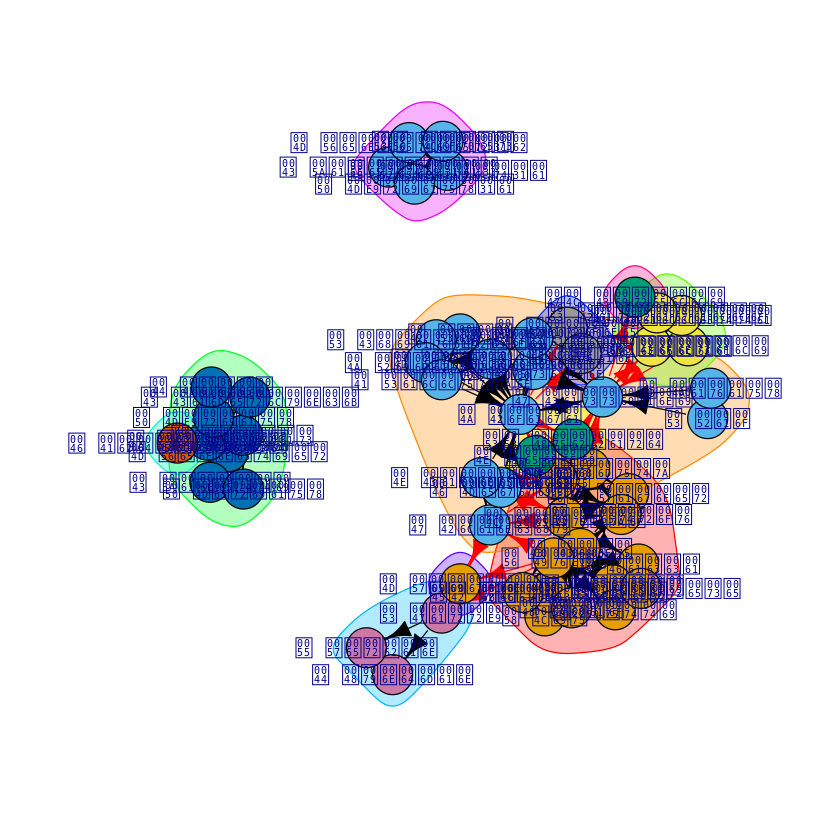